<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU53_impacto de las políticas de inversión en sanidad, infraestructuras y promoción turística en el SPI			</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>15.- Feature Importance</font>

<font color='steelblue'>Feature Importance is the process that assigns scores to the input characteristics to a model, which indicate the relative importance of each characteristic, in order, for example, to be able to select the most important ones.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Feature importance from model coefficients</b>			
- Linear Regression Feature importance		
- Logistic Regression Feature importance		
    
<font color='steelblue'><b>Perform Feature importance from Decision Tree			
- CART Feature Importance		
- Random Forest Regression Feature Importance		
    
<font color='steelblue'><b>Perform Feature importance from Permutation testing</b>			
    
<font color='steelblue'><b>Evaluate a Logistic Regression model with feature selection</b>			

## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_53_14_02_spi</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)
library(randomForest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_53_14_02_spi.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_53_14_02_spi.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 2028 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): rank_score_spi, score_spi, score_bhn, score_fow, score_opp, score_...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 2,028
Columns: 18
$ rank_score_spi <dbl> 80, 97, 46, 84, 99, 150, 74, 105, 36, 143, 154, 69, 168…
$ score_spi      <dbl> 0.234430921, -0.247745795, 0.644506738, -0.070067671, -…
$ score_bhn      <dbl> 0.4097479, 0.1290857, 0.5753443, 0.4274030, 0.3293843, …
$ score_fow      <dbl> 0.22131225, -0.67087093, 0.55485637, -0.04224433, -0.26…
$ score_opp      <dbl> 0.040287945, -0.176082184, 0.684177595, -0.557195503, -…
$ score_nbmc     <dbl> 0.4417846, -0.4611703, 0.4195220, 0.2610630, 0.5105377,…
$ score_ws       <dbl> 0.5398626, 0.3861578, 0.6209430, 0.1056095, 0.1274964, …
$ score_sh       <dbl> 0.6722671, 0.1921862, 0.7589734, 0.5545286, 0.6229812, …
$ score_ps       <dbl> -0.451618611, 0.297686264, 0.192315395, 0.822032832, -0…
$ score_abk      <dbl> 0.038575928, -1.291936532, 0.767026841, -0.404764773, -…
$ score_aic      <dbl> 0.65139291, -1.02544160, 0.37750377, -0.38712186, 0.831…
$ score_hw       <dbl> -0.17460539, 0.46862381, 0.28376095, 0.31816759, -0.652…
$ score_eq      

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

rank_score_spi,score_spi,score_bhn,score_fow,score_opp,score_nbmc,score_ws,score_sh,score_ps,score_abk,score_aic,score_hw,score_eq,score_pr,score_pfc,score_incl,score_aae,is_train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
80,0.23443092,0.4097479,0.22131225,0.04028795,0.4417846,0.5398626,0.6722671,-0.4516186,0.03857593,0.6513929,-0.1746054,0.1459135,0.49893581,-0.1770549,-0.412651603,0.1372673,TRUE
97,-0.24774579,0.1290857,-0.67087093,-0.17608218,-0.4611703,0.3861578,0.1921862,0.2976863,-1.29193653,-1.0254416,0.4686238,-0.1242652,0.02236525,0.1217203,0.380048297,-1.1496947,TRUE
46,0.64450674,0.5753443,0.55485637,0.68417760,0.4195220,0.6209430,0.7589734,0.1923154,0.76702684,0.3775038,0.2837610,0.4969887,0.89103387,0.3137906,0.997036708,0.1445618,TRUE
84,-0.07006767,0.4274030,-0.04224433,-0.55719550,0.2610630,0.1056095,0.5545286,0.8220328,-0.40476477,-0.3871219,0.3181676,0.6807734,-0.40632266,-0.4291470,0.009655802,-1.2085719,TRUE
99,-0.16212549,0.3293843,-0.26860033,-0.50440793,0.5105377,0.1274964,0.6229812,-0.1990627,-0.86329199,0.8315709,-0.6527993,-0.5169670,-0.45827120,-0.2884290,-0.645769408,-0.3842909,TRUE


## Feature importance from model coefficients

### Random Forest Regression Feature Importance

             Variable Importance
score_aic   score_aic  28.431229
score_spi   score_spi  25.082042
score_pr     score_pr  18.888207
score_eq     score_eq  18.588817
score_pfc   score_pfc  18.253725
score_opp   score_opp  15.397448
score_ps     score_ps  15.070984
score_incl score_incl  15.022924
score_ws     score_ws  13.252055
score_fow   score_fow  12.990803
score_bhn   score_bhn  12.818961
score_hw     score_hw  12.112635
score_abk   score_abk  10.550156
score_aae   score_aae  10.226508
score_nbmc score_nbmc   8.507431
score_sh     score_sh   8.195860


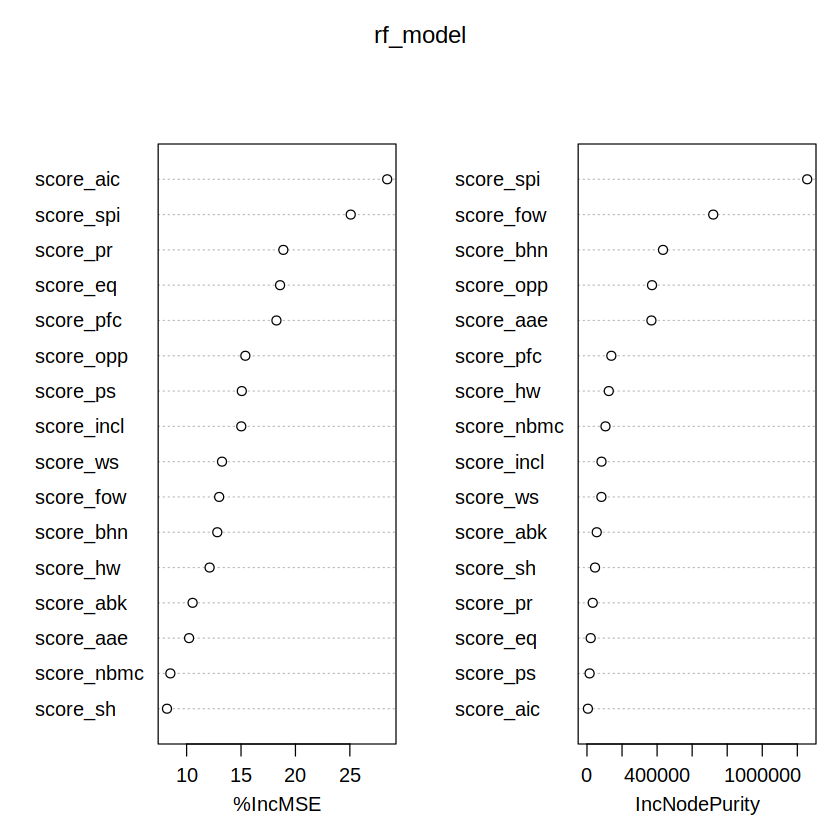

In [9]:
# Instala y carga el paquete randomForest si aún no lo has hecho

data_train <- data %>% filter(is_train == TRUE) %>% select(contains("score")) 

# Ajusta un modelo de Random Forest
# Asume que tienes un dataframe 'df' y quieres predecir 'y'
# y 'df' contiene sólo las variables que quieres usar en el modelo
rf_model <- randomForest(rank_score_spi ~ ., data = data_train, importance = TRUE, ntree = 500)

# Obtén la importancia de las variables
importance <- importance(rf_model)

# Crea un data.frame con los nombres de las variables y su importancia
importance_df <- data.frame(Variable = row.names(importance), Importance = importance[,1])

# Ordena las variables por importancia
importance_ordered <- importance_df[order(-importance_df$Importance), ]

# Imprime la importancia de las variables ordenada
print(importance_ordered)

# También puedes visualizar la importancia de las características con un gráfico
varImpPlot(rf_model)

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [10]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 15

In [11]:
caso <- "CU_53"
proceso <- '_15'
tarea <- "_02"
archivo <- ""
proper <- "_spi"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [12]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [13]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [14]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia
- En el proceso 05 se realizó un cluster, y los pasos en este notebook no aplican
- O bien se hacen en el dominio IV o V para integrar en el pipeline de modelización

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están listos para la modelización y despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>